# Solutions `networkx`

### Exercise 1

<img src="https://github.com/fneum/data-science-for-esm/raw/main/data-science-for-esm/example-graph.png" width="500px" />

**Task 1:** Build the graph shown above in `networkx` using the functions to add graphs. The weight of each edge should correspond to the sum of the node labels it connects.

In [2]:
import networkx as nx

In [3]:
G = nx.Graph()

In [4]:
edges = [
    (0, 1, dict(weight=1)),
    (0, 2, dict(weight=2)),
    (0, 3, dict(weight=3)),
    (0, 4, dict(weight=4)),
    (1, 2, dict(weight=3)),
    (1, 4, dict(weight=5)),
    (2, 3, dict(weight=5)),
    (3, 4, dict(weight=7)),
]

In [5]:
G.add_edges_from(edges)

**Task 2:** Draw the finished graph with `matplotlib`.

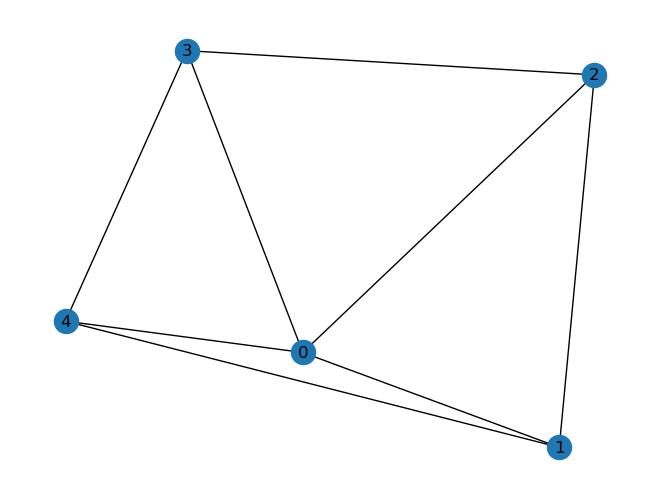

In [6]:
nx.draw(G, with_labels=True)

## Exercise 2

Reconsider the example of the European transmission network graph. Use the following code in a fresh notebook to get started:

```python
url = "https://tubcloud.tu-berlin.de/s/FmFrJkiWpg2QcQA/download/edges.csv"
edges = pd.read_csv(url, index_col=0)

G = nx.from_pandas_edgelist(edges, "bus0", "bus1", edge_attr=["x_pu", "s_nom"])

subgraphs = []
for c in nx.connected_components(G):
    subgraphs.append(G.subgraph(c).copy())
```

Choose one of the subgraphs (each representing a synchronous zone) and perform the following analyses:

In [7]:
import pandas as pd
import networkx as nx

url = "https://tubcloud.tu-berlin.de/s/FmFrJkiWpg2QcQA/download/edges.csv"
edges = pd.read_csv(url, index_col=0)

G = nx.from_pandas_edgelist(edges, "bus0", "bus1", edge_attr=["x_pu", "s_nom"])

subgraphs = []
for c in nx.connected_components(G):
    subgraphs.append(G.subgraph(c).copy())

In [8]:
G = subgraphs[3]  # vary the subgraph here

**Task 1:** Determine the number of transmission lines and buses.

In [9]:
len(G.edges)

408

In [10]:
len(G.nodes)

286

**Task 2:** Check whether the network is planar.

In [11]:
nx.is_planar(G)

False

**Task 3:** Calculate the average number of transmission lines connecting to a bus.

In [12]:
pd.Series({k: v for k, v in G.degree}).mean()

np.float64(2.8531468531468533)

**Task 4:** Determine the number of cycles forming the cycle basis.

In [13]:
len(nx.cycle_basis(G))

123

**Task 5:** Create a histogram of the length of the cycles (i.e. number of *edges* per cycle) in the cycle basis.

In [14]:
cycle_length = pd.Series([len(c) for c in nx.cycle_basis(G)])

<Axes: ylabel='Frequency'>

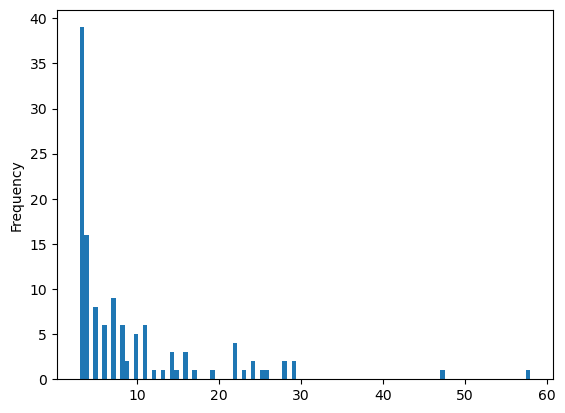

In [ ]:
cycle_length.plot.hist(bins=100);

<Axes: >

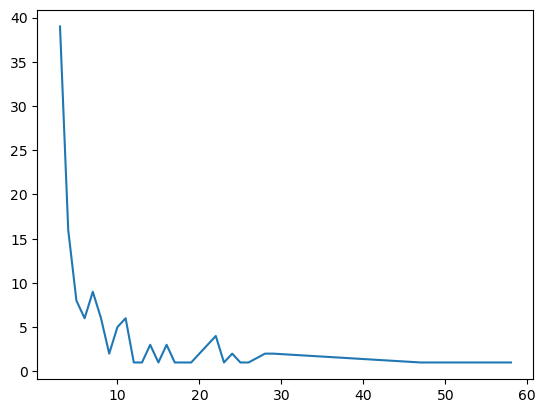

In [ ]:
# alternative
pd.Series([len(c) for c in nx.cycle_basis(G)]).value_counts().sort_index().plot();

**Task 6:** Calculate the average length of the cycles in the cycle basis.

In [17]:
cycle_length.describe()

count    123.000000
mean       8.918699
std        8.933813
min        3.000000
25%        3.000000
50%        5.000000
75%       11.000000
max       58.000000
dtype: float64

**Task 7:** Obtain the directed adjacency matrix.

In [18]:
nx.adjacency_matrix(G).todense()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(286, 286))

**Task 8:** Obtain the directed incidence matrix.

In [19]:
K = nx.incidence_matrix(G).todense()
K

array([[1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(286, 408))